In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
stocks=pd.read_csv("ind_nifty50list.csv")

In [3]:
nifty50_symbols  = list(stocks["Symbol"])

In [4]:
data = {}  # Dictionary to store stock data

for symbol in nifty50_symbols:
    stock_data = yf.download(symbol+".NS", start='2022-06-20', end='2023-06-22')  # Adjust start and end dates as needed
    data[symbol] = stock_data  # Store the data in the dictionary

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [5]:
df = pd.concat(data.values(), keys=data.keys())  # Concatenate the data into a single DataFrame with multi-index
df = df.reset_index().rename(columns={'level_0': 'Symbol'})  # Reset the index and rename the column

In [6]:
# Select only 'Symbol', 'Date', and 'Close' columns
df = df[['Symbol', 'Date', 'Close']]

# Handle missing values (if any)
df = df.dropna()

# Calculate daily returns for each stock
df['Return'] = df.groupby('Symbol')['Close'].pct_change()

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

In [7]:
print(df)

              Symbol        Close    Return
Date                                       
2022-06-20  ADANIENT  2079.850098       NaN
2022-06-21  ADANIENT  2161.800049  0.039402
2022-06-22  ADANIENT  2089.199951 -0.033583
2022-06-23  ADANIENT  2110.350098  0.010124
2022-06-24  ADANIENT  2161.449951  0.024214
...              ...          ...       ...
2023-06-15     WIPRO   388.950012 -0.018918
2023-06-16     WIPRO   381.299988 -0.019668
2023-06-19     WIPRO   380.149994 -0.003016
2023-06-20     WIPRO   382.500000  0.006182
2023-06-21     WIPRO   385.500000  0.007843

[12500 rows x 3 columns]


In [22]:
newdf = {}
for i in range(len(df['Symbol'])):
    symbol = df['Symbol'][i]
    if symbol not in newdf :
        newdf[symbol] = []
    newdf[symbol].append(df['Return'][i])

{'ADANIENT': [nan, 0.03940185461645673, -0.03358316958851271, 0.010123562597496472, 0.02421392240670217, 0.00932251356245839, 0.010542720466830469, 0.00703075356681615, -0.013152648091555252, 0.018850723752346532, 0.013282925872661666, -0.00680865036119449, 0.011751940643326186, 0.0006379440392352276, 0.008244294770894944, 0.03497522926412433, -0.003202400782155279, -0.005135968061762863, 0.012577054453473568, 0.009294574896595575, 0.007629185180854314, 0.0114292581514015, -8.156943984505283e-05, 0.018114275457866924, 0.0015627739305750232, 0.020484995324072885, 0.00356773040351821, -0.004297378681030195, 0.0006669875640297196, 0.007371412150246837, 0.035400106219989125, 0.008834088627597714, 0.010340394988096246, 0.004499592738774538, -0.009252531358838523, 0.034650164313595244, 0.01264373726238932, 0.002422926490717625, 0.01076198354810698, 0.0388542866875925, 0.011021994929560686, 0.048194374455813094, -0.007435813073114805, -0.0251101701941433, -0.006865314799468836, 0.034316071915

In [9]:
newdf = pd.DataFrame(newdf)
correlation_matrix = newdf.corr()
threshold = 0.75
result = []
for i in range(len(nifty50_symbols)):
    for j in range(i+1,len(nifty50_symbols)):
        symbol1 = nifty50_symbols[i]
        symbol2 = nifty50_symbols[j]
        if correlation_matrix[symbol1][symbol2] >= threshold:
            result.append((symbol1,symbol2,correlation_matrix[symbol1][symbol2]))

In [10]:
print(result)

[('BAJFINANCE', 'BAJAJFINSV', 0.8040147094182983), ('HDFCBANK', 'HDFC', 0.9371835598426792), ('HINDALCO', 'TATASTEEL', 0.7782710297061852)]


In [11]:
stock1_ticker = 'BAJFINANCE.NS'
stock2_ticker = 'BAJAJFINSV.NS'

stock1_data = yf.download(stock1_ticker, start='2022-06-20', end='2023-06-22')
stock2_data = yf.download(stock2_ticker, start='2022-06-20', end='2023-06-22')

stock1_close = stock1_data['Close']
stock2_close = stock2_data['Close']


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [12]:
'''fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(data['BAJFINANCE'].index, df['Return'][df['Symbol']=='BAJFINANCE'], label='BAJFINANCE')
ax.plot(data['BAJAJFINSV'].index, df['Return'][df['Symbol']=='BAJAJFINSV'], label='BAJAJFINSV')
ax.set_xlabel('Date')
ax.set_ylabel('Returns')
ax.legend()
plt.title('Returns of Stocks')
plt.show()'''

"fig, ax = plt.subplots(figsize=(12, 6))\nax.plot(data['BAJFINANCE'].index, df['Return'][df['Symbol']=='BAJFINANCE'], label='BAJFINANCE')\nax.plot(data['BAJAJFINSV'].index, df['Return'][df['Symbol']=='BAJAJFINSV'], label='BAJAJFINSV')\nax.set_xlabel('Date')\nax.set_ylabel('Returns')\nax.legend()\nplt.title('Returns of Stocks')\nplt.show()"

In [13]:
price_ratio = df['Close'][df['Symbol']=='BAJFINANCE'] / df['Close'][df['Symbol']=='BAJAJFINSV']
price_ratio_mean = np.mean(price_ratio)
price_ratio_std = np.std(price_ratio)
z_score = (price_ratio - price_ratio_mean) / price_ratio_std

In [14]:
print(f"price_ratio_mean = {price_ratio_mean}")
print(f"price_ratio_std = {price_ratio_std}")

price_ratio_mean = 4.4732733155202205
price_ratio_std = 0.2644391349319336


In [15]:
min_value = np.min(price_ratio)
print("Minimum value:", min_value)

max_value = np.max(price_ratio)
print("Maximum value:", max_value)

Minimum value: 4.005109232832773
Maximum value: 4.995840521394174


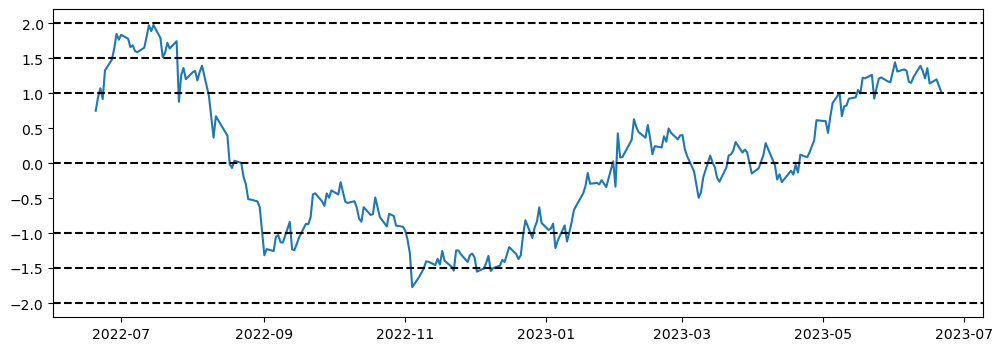

In [16]:
fig, plt = plt.subplots(figsize=(12, 4))

plt.plot(z_score.index, z_score)
plt.axhline(2, linestyle='dashed', color='black')
plt.axhline(1.5, linestyle='dashed', color='black')
plt.axhline(1, linestyle='dashed', color='black')
plt.axhline(0, linestyle='dashed', color='black')
plt.axhline(-1, linestyle='dashed', color='black')
plt.axhline(-1.5, linestyle='dashed', color='black')
plt.axhline(-2, linestyle='dashed', color='black')

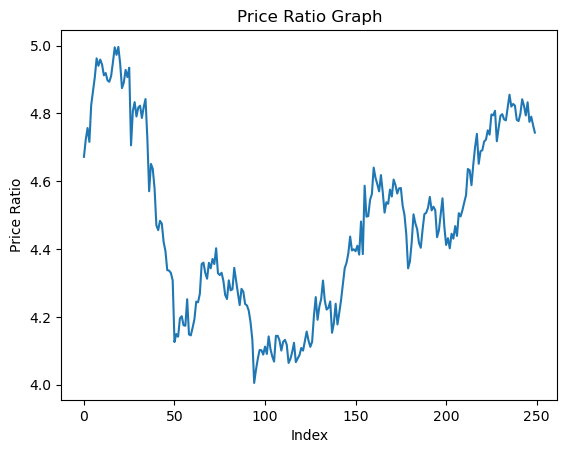

In [17]:
import matplotlib.pyplot as plt
z = range(len(price_ratio))

plt.plot(z, price_ratio)
plt.xlabel('Index')
plt.ylabel('Price Ratio')
plt.title('Price Ratio Graph')
plt.show()

In [18]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(price_ratio)
print('ADF Test Statistic: %f' % adf[0])
print('10%% Critical Value: %f' % adf[4]['10%'])
print('p-value: %f' % adf[1])

ADF Test Statistic: -1.676552
10% Critical Value: -2.573122
p-value: 0.443232


In [19]:
sell_signals = []
buy_signals = []
signals = []

status = ''
for i in z_score.index:
    if (z_score[i] > 1.5) and status != 'SELL':
        sell_signals.append(i)
        signals.append((i, 'SELL'))
        status = 'SELL'
    elif (z_score[i] < -1.5) and status != 'BUY':
        buy_signals.append(i)
        signals.append((i, 'BUY'))
        status = 'BUY'
    elif (z_score[i] < -0.5) and status == 'SELL':
        buy_signals.append(i)
        signals.append((i, 'BUY'))
        status = 'MEAN'
    elif (z_score[i] > 0.5) and status == 'BUY':
        sell_signals.append(i)
        signals.append((i, 'SELL'))
        status = 'MEAN'
    else:
        signals.append((i, 'NONE'))

print("Sell signals:", sell_signals)
print("Buy signals:", buy_signals)

Sell signals: [Timestamp('2022-06-28 00:00:00'), Timestamp('2023-02-08 00:00:00')]
Buy signals: [Timestamp('2022-08-25 00:00:00'), Timestamp('2022-11-04 00:00:00')]


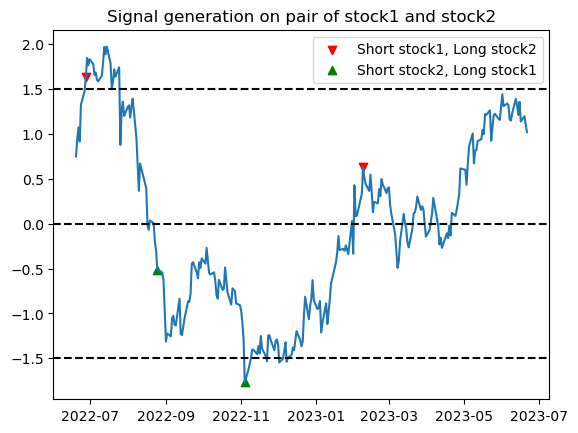

In [20]:
import matplotlib.pyplot as plt

plt.figure()
plt.title("Signal generation on pair of stock1 and stock2")
plt.plot(z_score.index, z_score)
plt.scatter(sell_signals, z_score[sell_signals], marker='v', color='r', label='Short stock1, Long stock2')
plt.scatter(buy_signals, z_score[buy_signals], marker='^', color='g', label='Short stock2, Long stock1')
plt.axhline(1.5, linestyle='dashed', color='black')
plt.axhline(-1.5, linestyle='dashed', color='black')
plt.axhline(0, linestyle='dashed', color='black')
plt.legend()

plt.show()


current value = 142047.00524902344
returns = 42.04700524902343%
Sharpe Ratio: 2.219180232732469
Maximum Drawdown: -2.5541430877502087


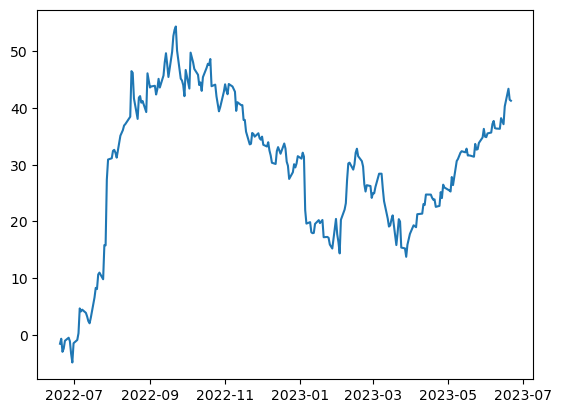

In [21]:
import pandas as pd
import numpy as np

capital = 1_00_000

n_stock1 = (capital // 2) // stock1_data['Close'][0]
n_stock2 = (capital // 2) // stock2_data['Close'][0]

capital -= n_stock1 * stock1_data['Close'][0]
capital -= n_stock2 * stock2_data['Close'][0]

index = []
returns = []

for i in signals:
    if i[1] == 'SELL': 
        capital += n_stock1 * stock1_data['Close'][i[0]]
        n_stock1 = 0
        n_stock2 += capital // stock2_data['Close'][i[0]]
        capital -= (capital // stock2_data['Close'][i[0]]) * stock2_data['Close'][i[0]]
    elif i[1] == 'BUY':
        capital += n_stock2 * stock2_data['Close'][i[0]]
        n_stock2 = 0
        n_stock1 += capital // stock1_data['Close'][i[0]]
        capital -= (capital // stock1_data['Close'][i[0]]) * stock1_data['Close'][i[0]]

    current_value = n_stock1 * stock1_data['Close'][i[0]] + n_stock2 * stock2_data['Close'][i[0]]

    returns.append((current_value / 1_00_000 - 1) * 100)
    index.append(i[0])

current_value = n_stock1 * stock1_data['Close'][-1] + n_stock2 * stock2_data['Close'][-1] + capital

# Calculate portfolio returns, cumulative returns, and maximum drawdown
portfolio_returns = (returns / capital) * 100
cumulative_returns = np.cumprod(1 + portfolio_returns/100) - 1
peak = np.maximum.accumulate(cumulative_returns)
drawdown = (cumulative_returns - peak) / (peak + 1) * 100
max_drawdown = drawdown.min()

# Calculate mean return, standard deviation, and Sharpe Ratio
mean_return = portfolio_returns.mean()
std_return = portfolio_returns.std()
risk_free_rate = 0.05  # Assumed risk-free rate of 5%
sharpe_ratio = (mean_return - risk_free_rate) / std_return

print(f"current value = {current_value}")
print(f"returns = {((current_value) / 1_00_000 - 1) * 100}%")
print("Sharpe Ratio:", sharpe_ratio)
print("Maximum Drawdown:", max_drawdown)

plt.plot(index, returns)
